In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Clustering
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
iris.shape

(150, 5)

In [11]:
# split the train data into independent variables (X) and dependent variable (Y)
x_iris = iris.drop('species', axis = 1)
print(x_iris.shape)
y_iris = iris['species']
print(y_iris.shape)
print(type(x_iris))
print(type(y_iris))

(150, 4)
(150,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [12]:
# calculate distance
from scipy.spatial.distance import pdist
x_dist = pdist(x_iris)
print(x_dist)

[0.53851648 0.50990195 0.64807407 ... 0.6164414  0.64031242 0.76811457]


In [13]:
x_dist.shape

(11175,)

In [6]:
75*149

11175

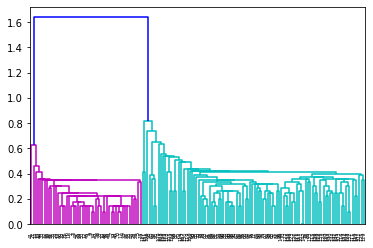

In [14]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
x_dendo = hierarchy.linkage(x_dist, 'single')
plt.figure()
dn = hierarchy.dendrogram(x_dendo)
#hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
plt.show()

In [15]:
# apply Gaussian Mixture model to group the data
from sklearn.cluster import AgglomerativeClustering
AHC = AgglomerativeClustering(n_clusters = 2,linkage='average')
AHC.fit(x_iris)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)

In [16]:
print(AHC.labels_)
print(AHC.n_leaves_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
150


In [17]:
print(AHC.n_connected_components_)

1


In [17]:
# order of merging
print(AHC.children_)

[[101 142]
 [  7  39]
 [  0  17]
 [  9  34]
 [128 132]
 [ 10  48]
 [  4  37]
 [ 19  21]
 [ 29  30]
 [ 57  93]
 [ 80  81]
 [116 137]
 [  8  38]
 [  3  47]
 [ 27  28]
 [ 82  92]
 [ 95  96]
 [127 138]
 [  1  45]
 [ 63  91]
 [ 65  75]
 [ 40 152]
 [ 49 151]
 [ 12 168]
 [123 126]
 [112 139]
 [ 94  99]
 [ 88 166]
 [ 25 153]
 [ 46 157]
 [  2 163]
 [164 171]
 [ 66  84]
 [ 23  26]
 [ 53  89]
 [ 74  97]
 [172 181]
 [ 69 160]
 [173 178]
 [ 78 169]
 [110 147]
 [120 143]
 [ 43 183]
 [136 148]
 [ 54  58]
 [140 144]
 [103 161]
 [141 145]
 [176 177]
 [ 42 162]
 [158 180]
 [ 70 167]
 [ 67 165]
 [156 186]
 [ 68  87]
 [113 150]
 [ 50  52]
 [ 51  56]
 [107 130]
 [105 122]
 [ 20  31]
 [155 179]
 [ 11  24]
 [188 200]
 [ 13 199]
 [ 73 189]
 [191 195]
 [ 86 206]
 [104 154]
 [146 174]
 [ 55  90]
 [149 201]
 [121 205]
 [170 194]
 [ 83 133]
 [  5  18]
 [184 187]
 [115 193]
 [ 32  33]
 [125 129]
 [124 216]
 [ 36 210]
 [ 61 198]
 [ 35 203]
 [ 76 217]
 [ 71 185]
 [ 98 159]
 [175 197]
 [ 72 224]
 [ 16 211]
 [111 196]

In [18]:
# include new column 'cluster' to iris data
iris ["cluster"] = AHC.labels_
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species  cluster
0           5.1          3.5           1.4          0.2  setosa        1
1           4.9          3.0           1.4          0.2  setosa        1
2           4.7          3.2           1.3          0.2  setosa        1
3           4.6          3.1           1.5          0.2  setosa        1
4           5.0          3.6           1.4          0.2  setosa        1


In [17]:
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [19]:
import pandas as pd
pd.unique(iris["cluster"])

array([1, 0], dtype=int64)

In [20]:
pd.unique(iris["species"])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [23]:
iris[(iris.species == "virginica")]

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
100,6.3,3.3,6.0,2.5,virginica,0
101,5.8,2.7,5.1,1.9,virginica,0
102,7.1,3.0,5.9,2.1,virginica,0
103,6.3,2.9,5.6,1.8,virginica,0
104,6.5,3.0,5.8,2.2,virginica,0
105,7.6,3.0,6.6,2.1,virginica,0
106,4.9,2.5,4.5,1.7,virginica,0
107,7.3,2.9,6.3,1.8,virginica,0
108,6.7,2.5,5.8,1.8,virginica,0
109,7.2,3.6,6.1,2.5,virginica,0


In [23]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import numpy as np

In [5]:
x = np.array([1,1,2,1,1,1.5,3.5,4,4,3,4,4])
x.resize(6,2)
print(x)
print(x.shape)

[[1.  1. ]
 [2.  1. ]
 [1.  1.5]
 [3.5 4. ]
 [4.  3. ]
 [4.  4. ]]
(6, 2)


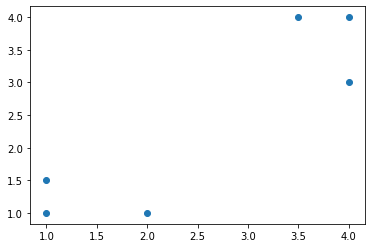

In [6]:
import pandas as pd
x1 = pd.DataFrame(x,columns=["X","Y"])
plt.scatter(x1.X, x1.Y)
plt.show()

In [7]:
from scipy.spatial.distance import pdist
y = pdist(x)
print(y)
print(y.shape)

[1.         0.5        3.90512484 3.60555128 4.24264069 1.11803399
 3.35410197 2.82842712 3.60555128 3.53553391 3.35410197 3.90512484
 1.11803399 0.5        1.        ]
(15,)


In [8]:
z = hierarchy.linkage(y, 'single')
print(z)

[[0.         2.         0.5        2.        ]
 [3.         5.         0.5        2.        ]
 [1.         6.         1.         3.        ]
 [4.         7.         1.         3.        ]
 [8.         9.         2.82842712 6.        ]]


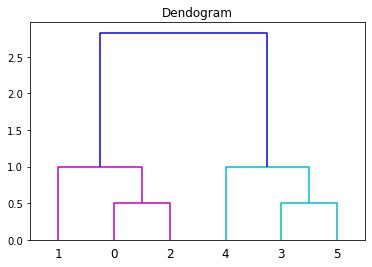

In [9]:
dn = hierarchy.dendrogram(z)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
plt.title("Dendogram")
plt.show()

(36,)


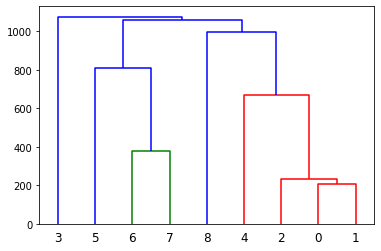

In [4]:
# The following is distances among the various cities in US
# 0: BOS, 1: NY, 2: DC, 3:MIA, 4:CHI, 5:SEA, 6:SF, 7:LA, 8:DEN
ytdist = np.array([206,429,1504,963,2976,3095,2979,1949,
                   233,1308,802,2815,2934,2786,1771,
                   1075,671,2684,2799,2631,1616,
                   1329,3273,3053,2687,2037,
                   2013,2142,2054,996,
                   808,1131,1307,
                   379,1235,
                   1059])
print(ytdist.shape)
from scipy.cluster import hierarchy
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
plt.show()